### Начало лабораторной работы

In [3]:
import pandas as pd
df = pd.read_csv("..//static//csv//ndtv_data_final.csv")
print(df.columns)
display(df.head(10))

Index(['Unnamed: 0', 'Name', 'Brand', 'Model', 'Battery capacity (mAh)',
       'Screen size (inches)', 'Touchscreen', 'Resolution x', 'Resolution y',
       'Processor', 'RAM (MB)', 'Internal storage (GB)', 'Rear camera',
       'Front camera', 'Operating system', 'Wi-Fi', 'Bluetooth', 'GPS',
       'Number of SIMs', '3G', '4G/ LTE', 'Price'],
      dtype='object')


Unnamed: 0                            Name    Brand  \
0           0  OnePlus 7T Pro McLaren Edition  OnePlus   
1           1                   Realme X2 Pro   Realme   
2           2               iPhone 11 Pro Max    Apple   
3           3                       iPhone 11    Apple   
4           4                    LG G8X ThinQ       LG   
5           5                      OnePlus 7T  OnePlus   
6           6                  OnePlus 7T Pro  OnePlus   
7           7         Samsung Galaxy Note 10+  Samsung   
8           8                Asus ROG Phone 2     Asus   
9           9            Xiaomi Redmi K20 Pro   Xiaomi   

                    Model  Battery capacity (mAh)  Screen size (inches)  \
0  7T Pro McLaren Edition                    4085                  6.67   
1                  X2 Pro                    4000                  6.50   
2       iPhone 11 Pro Max                    3969                  6.50   
3               iPhone 11                    3110                  6.10   
4               G8X ThinQ                    4000                  6.40   
5                      7T                    3800                  6.55   
6                  7T Pro                    4085                  6.67   
7         Galaxy Note 10+                    4300                  6.80   
8             ROG Phone 2                    6000                  6.59   
9           Redmi K20 Pro                    4000                  6.39   

  Touchscreen  Resolution x  Resolution y  Processor  ...  Rear camera  \
0         Yes          1440          3120          8  ...         48.0   
1         Yes          1080          2400          8  ...         64.0   
2         Yes          1242          2688          6  ...         12.0   
3         Yes           828          1792          6  ...         12.0   
4         Yes          1080          2340          8  ...         12.0   
5         Yes          1080          2400          8  ...         48.0   
6         Yes          1440          3120          8  ...         48.0   
7         Yes          1440          3040          8  ...         12.0   
8         Yes          1080          2340          8  ...         48.0   
9         Yes          1080          2340          8  ...         48.0   

   Front camera  Operating system  Wi-Fi Bluetooth  GPS Number of SIMs   3G  \
0          16.0           Android    Yes       Yes  Yes              2  Yes   
1          16.0           Android    Yes       Yes  Yes              2  Yes   
2          12.0               iOS    Yes       Yes  Yes              2  Yes   
3          12.0               iOS    Yes       Yes  Yes              2  Yes   
4          32.0           Android    Yes       Yes  Yes              1   No   
5          16.0           Android    Yes       Yes   No              2  Yes   
6          16.0           Android    Yes       Yes  Yes              2  Yes   
7          10.0           Android    Yes       Yes  Yes              2  Yes   
8          24.0           Android    Yes       Yes  Yes              1  Yes   
9          20.0           Android    Yes       Yes  Yes              2   No   

   4G/ LTE   Price  
0      Yes   58998  
1      Yes   27999  
2      Yes  106900  
3      Yes   62900  
4       No   49990  
5      Yes   34930  
6      Yes   52990  
7      Yes   79699  
8      Yes   37999  
9       No   23190  

[10 rows x 22 columns]

## Регрессия

Цель: Разработать модель регрессии, которая будет предсказывать цену мобильного телефона на основе его технических характеристик и функциональных особенностей.

Применение:

Производители и продавцы мобильных телефонов: Модель может помочь в установлении справедливой цены для новых моделей, основываясь на их технических характеристиках, что может быть полезно для ценообразования и конкуренции на рынке.

Потребители: Модель может помочь пользователям принимать более обоснованные решения при покупке, сравнивая цены и характеристики различных моделей.

Рыночные аналитики: Модель может быть использована для анализа тенденций на рынке мобильных телефонов, выявления факторов, влияющих на цену, и прогнозирования будущих изменений.

Исследования в области технологий: Модель может помочь в изучении влияния различных технических характеристик на цену и популярность моделей.

#### Удаление выбросов

In [4]:
import pandas as pd
from scipy import stats

# Загружаем набор данных
df = pd.read_csv("..//static//csv//ndtv_data_final.csv")

# Удаление пустого столбца по имени
df = df.drop('Unnamed: 0', axis=1)

# Выбор числовых признаков для анализа выбросов
numeric_features = [
    'Battery capacity (mAh)', 'Screen size (inches)', 'Resolution x', 
    'Resolution y', 'Processor', 'RAM (MB)', 'Internal storage (GB)', 
    'Rear camera', 'Front camera', 'Number of SIMs', 'Price'
]

# Вычисление Z-оценок для числовых признаков
z_scores = stats.zscore(df[numeric_features])

# Определение порога для выбросов
threshold = 3

# Вывод размеров данных до удаления выбросов
print("Размер данных до удаления выбросов:", df.shape)

# Удаление строк, содержащих выбросы
df = df[(z_scores < threshold).all(axis=1)]

# Вывод размеров данных после удаления выбросов
print("Размер данных после удаления выбросов:", df.shape)

Размер данных до удаления выбросов: (1359, 21)
Размер данных после удаления выбросов: (1256, 21)


#### Подготовка данных и оценка базовой модели

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# Выбор признаков и целевой переменной
features = [
    'Brand', 'Battery capacity (mAh)',
       'Screen size (inches)', 'Touchscreen', 'Resolution x', 'Resolution y',
       'Processor', 'RAM (MB)', 'Internal storage (GB)', 'Rear camera',
       'Front camera', 'Operating system', 'Wi-Fi', 'Bluetooth', 'GPS',
       'Number of SIMs', '3G', '4G/ LTE'
]
target = 'Price'

global X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

# Базовые предсказания (среднее значение целевой переменной)
baseline_predictions = [y_train.mean()] * len(y_test)

# Оценка базовой модели
print('Baseline MAE:', mean_absolute_error(y_test, baseline_predictions))
print('Baseline MSE:', mean_squared_error(y_test, baseline_predictions))
print('Baseline R²:', r2_score(y_test, baseline_predictions))

Размер обучающей выборки: (1004, 18)
Размер тестовой выборки: (252, 18)
Baseline MAE: 4662.689511794094
Baseline MSE: 50560680.710365206
Baseline R²: -0.001378207894705552


#### Обучение и оценка моделей

In [6]:
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Выбор признаков и целевой переменной
categorical_features = [
    'Brand', 'Touchscreen', 'Operating system', 'Wi-Fi', 
    'Bluetooth', 'GPS', '3G', '4G/ LTE'
]
numeric_features = [
    'Battery capacity (mAh)', 'Screen size (inches)', 'Resolution x', 
    'Resolution y', 'Processor', 'RAM (MB)', 'Internal storage (GB)', 'Rear camera', 
    'Front camera', 'Number of SIMs'
]
target = 'Price'

# Препроцессор для обработки числовых и категориальных признаков
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Масштабирование числовых признаков
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Однократная кодировка категориальных признаков
    ]
)

# Создание пайплайнов для моделей
pipeline_linear_regression = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline_decision_tree = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

pipeline_gradient_boosting = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Список моделей для сравнения
pipelines = [
    ('Linear Regression', pipeline_linear_regression),
    ('Decision Tree', pipeline_decision_tree),
    ('Gradient Boosting', pipeline_gradient_boosting)
]

# Обучение моделей и вывод результатов
for name, pipeline in pipelines:
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    print(f"Model: {name} trained.")
    print(f"MAE: {mean_absolute_error(y_test, predictions)}")
    print(f"MSE: {mean_squared_error(y_test, predictions)}")
    print(f"R²: {r2_score(y_test, predictions)}")
    print("-" * 50)

Model: Linear Regression trained.
MAE: 3251.7122571814075
MSE: 25623200.493888523
R²: 0.4925203887566195
--------------------------------------------------
Model: Decision Tree trained.
MAE: 4112.809523809524
MSE: 56543100.29960317
R²: -0.11986285887206449
--------------------------------------------------
Model: Gradient Boosting trained.
MAE: 2793.2991365668017
MSE: 23739724.17710429
R²: 0.5298235285129411
--------------------------------------------------


Линейная регрессия улучшила качество предсказаний по сравнению с базовой моделью, но показала меньшую эффективность, чем градиентный бустинг

* MAE уменьшился на 1410.98 (30% улучшение).

* MSE уменьшился на 24937480.22 (49% улучшение).

* R² стал положительным (0.4925), что означает, что модель объясняет 49.25% изменчивости цены.

Дерево решений оказалось наименее эффективным среди всех моделей, показав худшие результаты даже по сравнению с базовой моделью.

* MAE увеличился на 450.12 (9.6% ухудшение).

* MSE увеличился на 5982419.59 (11.8% ухудшение).

* R² стал еще ниже (-0.1199), что указывает на то, что модель работает хуже, чем базовая.

Градиентный бустинг показал лучшие результаты среди всех моделей:

* MAE уменьшился на 1869.39 (40% улучшение) по сравнению с базовой моделью.

* MSE уменьшился на 26820956.53 (53% улучшение) по сравнению с базовой моделью.

* R² достиг 0.5298, что означает, что модель объясняет 52.98% изменчивости цены.

Таким образом, градиентный бустинг является наиболее подходящей моделью для предсказания цены мобильных телефонов на основе выбранных признаков.

## Классификация 

Цель: Целью классификации является разработка модели, которая будет предсказывать категорию цены мобильного телефона на основе его технических характеристик и функциональных особенностей.

Применение классификации:

1. Рыночная аналитика:

* Помогает производителям и продавцам телефонов определять целевую аудиторию для конкретных моделей.

* Позволяет анализировать конкуренцию в разных ценовых сегментах.

2. Потребительские рекомендации:

* Помогает пользователям выбирать телефоны, соответствующие их бюджету и требованиям.

* Упрощает процесс сравнения телефонов в рамках одной ценовой категории.

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Выбор признаков и целевой переменной
features = [
    'Brand', 'Battery capacity (mAh)',
       'Screen size (inches)', 'Touchscreen', 'Resolution x', 'Resolution y',
       'Processor', 'RAM (MB)', 'Internal storage (GB)', 'Rear camera',
       'Front camera', 'Operating system', 'Wi-Fi', 'Bluetooth', 'GPS',
       'Number of SIMs', '3G', '4G/ LTE'
]
target = 'Price'

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

print("Размер обучающей выборки:", X_train.shape)
print("Размер тестовой выборки:", X_test.shape)

Размер обучающей выборки: (1004, 18)
Размер тестовой выборки: (252, 18)


In [8]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy.stats import uniform, randint
from sklearn.model_selection import RandomizedSearchCV

# Выбор признаков и целевой переменной
features = [
    'Brand', 'Battery capacity (mAh)', 'Screen size (inches)', 'Touchscreen', 
    'Resolution x', 'Resolution y', 'Processor', 'RAM (MB)', 'Internal storage (GB)', 
    'Rear camera', 'Front camera', 'Operating system', 'Wi-Fi', 'Bluetooth', 'GPS', 
    'Number of SIMs', '3G', '4G/ LTE'
]
target = 'PriceCategory'  # Целевая переменная: категория цены

# Преобразование целевой переменной в категории (например, бюджетные, средний класс, премиум)
bins = [0, 10000, 60000, float('inf')]
labels = ['Budget', 'Mid-Range', 'Premium']
df['PriceCategory'] = pd.cut(df['Price'], bins=bins, labels=labels)

# Преобразование категорий в числа
label_encoder = LabelEncoder()
df[target] = label_encoder.fit_transform(df[target])

# Определение категориальных и числовых признаков
categorical_features = [
    'Brand', 'Touchscreen', 'Operating system', 'Wi-Fi', 
    'Bluetooth', 'GPS', '3G', '4G/ LTE'
]
numeric_features = [
    'Battery capacity (mAh)', 'Processor', 'Screen size (inches)', 'Resolution x', 
    'Resolution y', 'RAM (MB)', 'Internal storage (GB)', 'Rear camera', 
    'Front camera', 'Number of SIMs'
]

# Препроцессор для обработки числовых и категориальных признаков
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Применение препроцессора
X = preprocessor.fit_transform(df[features])
y = df[target]

# Балансировка классов с помощью SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(pd.Series(y_resampled).value_counts())

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Функция для оценки модели
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted') 
    recall = recall_score(y_test, y_pred, average='weighted')  
    f1 = f1_score(y_test, y_pred, average='weighted')  
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    
    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc
    }

# Логистическая регрессия
print("Гиперпараметры для логистической регрессии:")
logreg_param_dist = {
    'classifier__C': uniform(loc=0, scale=4),
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['liblinear', 'saga']
}

logreg_pipeline = Pipeline([
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

logreg_random_search = RandomizedSearchCV(logreg_pipeline, param_distributions=logreg_param_dist, n_iter=50, cv=5, random_state=42, n_jobs=-1)
logreg_random_search.fit(X_train, y_train)
logreg_best_model = logreg_random_search.best_estimator_
logreg_results = evaluate_model(logreg_best_model, X_test, y_test)

# Случайный лес
print("Гиперпараметры для случайного леса:")
rf_param_dist = {
    'classifier__n_estimators': randint(100, 1000),
    'classifier__max_depth': [None] + list(randint(10, 100).rvs(10)),
    'classifier__min_samples_split': randint(2, 20),
    'classifier__min_samples_leaf': randint(1, 20),
    'classifier__bootstrap': [True, False]
}

rf_pipeline = Pipeline([
    ('classifier', RandomForestClassifier(random_state=42))
])

rf_random_search = RandomizedSearchCV(rf_pipeline, param_distributions=rf_param_dist, n_iter=50, cv=5, random_state=42, n_jobs=-1)
rf_random_search.fit(X_train, y_train)
rf_best_model = rf_random_search.best_estimator_
rf_results = evaluate_model(rf_best_model, X_test, y_test)

# Градиентный бустинг
print("Гиперпараметры для градиентного бустинга:")
gb_param_dist = {
    'classifier__n_estimators': randint(100, 1000),
    'classifier__learning_rate': uniform(0.01, 0.5),
    'classifier__max_depth': [None] + list(randint(10, 100).rvs(10)),
    'classifier__min_samples_split': randint(2, 20),
    'classifier__min_samples_leaf': randint(1, 20),
    'classifier__subsample': uniform(0.5, 0.5)
}

gb_pipeline = Pipeline([
    ('classifier', GradientBoostingClassifier(random_state=42))
])

gb_random_search = RandomizedSearchCV(gb_pipeline, param_distributions=gb_param_dist, n_iter=50, cv=5, random_state=42, n_jobs=-1)
gb_random_search.fit(X_train, y_train)
gb_best_model = gb_random_search.best_estimator_
gb_results = evaluate_model(gb_best_model, X_test, y_test)

# Вывод результатов
print("\nРезультаты моделей:")
print("\nLogistic Regression:")
for metric, value in logreg_results.items():
    print(f"{metric.capitalize()}: {value:.4f}")

print("\nRandom Forest:")
for metric, value in rf_results.items():
    print(f"{metric.capitalize()}: {value:.4f}")

print("\nGradient Boosting:")
for metric, value in gb_results.items():
    print(f"{metric.capitalize()}: {value:.4f}")

PriceCategory
1    946
0    946
Name: count, dtype: int64
Гиперпараметры для логистической регрессии:
Accuracy: 0.8760
Precision: 0.8784
Recall: 0.8760
F1-Score: 0.8762
ROC-AUC: 0.9521
Гиперпараметры для случайного леса:
Accuracy: 0.9393
Precision: 0.9395
Recall: 0.9393
F1-Score: 0.9392
ROC-AUC: 0.9833
Гиперпараметры для градиентного бустинга:
Accuracy: 0.9261
Precision: 0.9261
Recall: 0.9261
F1-Score: 0.9261
ROC-AUC: 0.9777

Результаты моделей:

Logistic Regression:
Accuracy: 0.8760
Precision: 0.8784
Recall: 0.8760
F1: 0.8762
Roc_auc: 0.9521

Random Forest:
Accuracy: 0.9393
Precision: 0.9395
Recall: 0.9393
F1: 0.9392
Roc_auc: 0.9833

Gradient Boosting:
Accuracy: 0.9261
Precision: 0.9261
Recall: 0.9261
F1: 0.9261
Roc_auc: 0.9777


Logistic Regression Metrics:
Accuracy: 0.8760
Precision: 0.8784
Recall: 0.8760
F1-Score: 0.8762
ROC-AUC: 0.9521


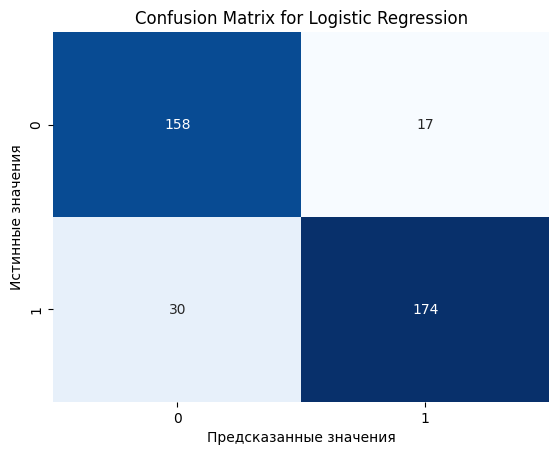

Random Forest Metrics:
Accuracy: 0.9393
Precision: 0.9395
Recall: 0.9393
F1-Score: 0.9392
ROC-AUC: 0.9833


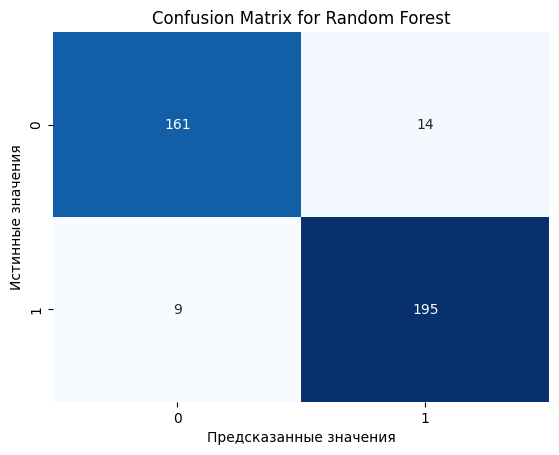

Gradient Boosting Metrics:
Accuracy: 0.9261
Precision: 0.9261
Recall: 0.9261
F1-Score: 0.9261
ROC-AUC: 0.9777


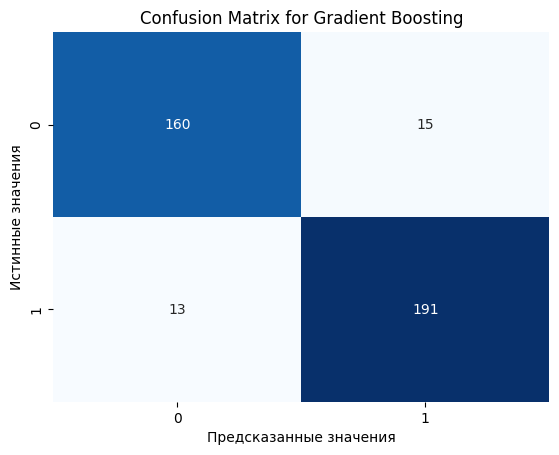

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import label_binarize
import numpy as np

# Функция для построения матрицы ошибок
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Предсказанные значения')
    plt.ylabel('Истинные значения')
    plt.show()

# Функция для оценки и визуализации модели
def evaluate_and_plot_model(model, X_test, y_test, model_name, class_names):
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    # Метрики
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='weighted')
    
    print(f"{model_name} Metrics:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    
    # Визуализация
    plot_confusion_matrix(y_test, y_pred, f'Confusion Matrix for {model_name}')

# Пример использования
class_names = ['Budget', 'Mid-Range', 'Premium']
evaluate_and_plot_model(logreg_best_model, X_test, y_test, 'Logistic Regression', class_names)
evaluate_and_plot_model(rf_best_model, X_test, y_test, 'Random Forest', class_names)
evaluate_and_plot_model(gb_best_model, X_test, y_test, 'Gradient Boosting', class_names)